# Data-Driven Decision Making: Analysis of Retail Sales Records

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About Dataset

This dataset contains purchase records with customer value based on product, store location, and price. Looker Studio and graphic visualization are used to gain better insights.

In [2]:
#import dataset using pandas
df_retail = pd.read_csv('Retail_Transaction_Dataset.csv')

# Data Cleaning

Data cleaning involves identifying incomplete values in the table. Use the count() function to clean up your data. The count() function determines the number of values in each column. If a column contains null, the columns are not identical.

In [3]:
df_retail.count()

CustomerID            100000
ProductID             100000
Quantity              100000
Price                 100000
TransactionDate       100000
PaymentMethod         100000
StoreLocation         100000
ProductCategory       100000
DiscountApplied(%)    100000
TotalAmount           100000
dtype: int64

If you are unsure about the outcome of using count(), you can use the more detailed info() function. The drawback of the info() function is that it consumes more memory than count().

In [148]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


To enable trend visualization, the TransactionDate column is converted from data type object to datetime using the to_datetime function in a predefined format.

In [4]:
df_retail['TransactionDate'] = pd.to_datetime(df_retail['TransactionDate'], format='%m/%d/%Y %H:%M')

The info() function returned no null values in any of the columns. So we can start processing the data right away to gain insight. The first step is to examine the table's structure, which can be accessed using the head() function.

In [40]:
df_retail.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


## Data Processing

### Customer Segmentation

To clearly see customer groups, we can divide them according to their ordering habits. The simpler ones are based on ProductCategory, PaymentMethod, and Product ID.

#### ProductID segmentation

In [5]:
productid_segment = df_retail.groupby(['ProductID']).agg({'Quantity':'sum'})
productid_segment = productid_segment.rename(columns={'Quantity':'sum'}).reset_index()

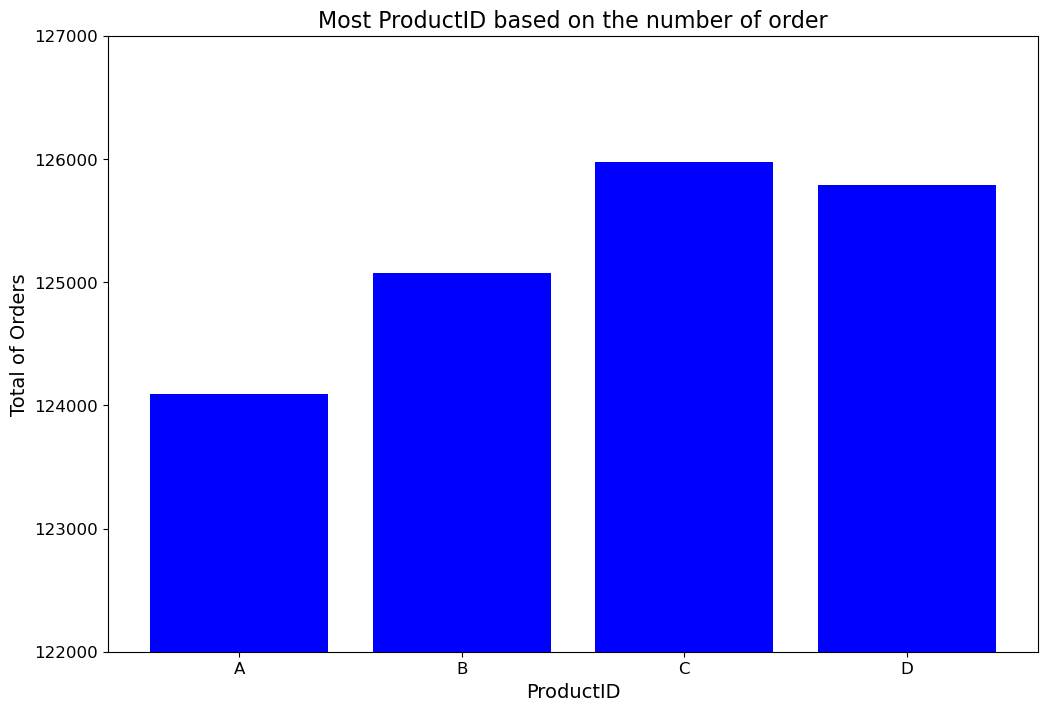

In [7]:
plt.figure(figsize=(12, 8))
plt.bar(productid_segment['ProductID'], productid_segment['sum'], color='blue')

plt.title('Most ProductID based on the number of order', fontsize=16)
plt.xlabel('ProductID', fontsize=14)
plt.ylabel('Total of Orders', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(122000, 127000)

plt.show()

ProductID C, D, and B have the most customers who have placed orders, followed by ProductID A. The ProductID calculations are performed by aggregating the sum against the Quantity for each CustomerID. When compared to the highest profit generated by ProductID, you can use aggregation in TotalAmount.

In [8]:
productid_segment['TotalAmount'] = df_retail.groupby('ProductID').agg({'TotalAmount':'sum'}).reset_index()['TotalAmount']

<Figure size 1200x800 with 0 Axes>

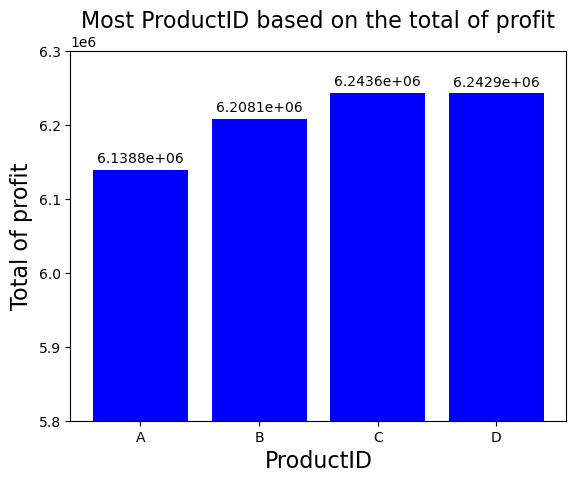

In [145]:
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
bars = ax.bar(df['ProductID'], df['TotalAmount'], color='blue')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.5}',  # format the label as scientific notation with 2 decimals
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('ProductID', fontsize=16)
ax.set_ylabel('Total of profit', fontsize=16)
ax.set_title('Most ProductID based on the total of profit', fontsize=16)
plt.ylim(5.8e+06, 6.3e+06)

plt.show()

Based on TotalAmount, the ProductIDs that generate the most profit are C, D, B, and A. To obtain the TotalAmount for each ProductID, group by ProductID and apply aggregate sum() to each TotalAmount.

Based on the two plots of Number of Orders and Total Profit, it generates a direct comparison of Total Orders and Total Profit.

In [81]:
trend_productid = df_retail.groupby(['TransactionDate', 'ProductID']).agg({'TotalAmount':'sum', 'Quantity':'sum'}).reset_index()
trend_productid['TransactionMonthYear'] = trend_productid['TransactionDate'].dt.to_period('M').astype(str)
trend_productid = trend_productid.groupby('TransactionMonthYear').agg({'TotalAmount':'sum', 'Quantity':'sum'}).reset_index()

In [84]:
trend_productid['totalamount (%)'] = trend_productid['TotalAmount']/trend_productid['TotalAmount'].sum()*100
trend_productid['quantity (%)'] = trend_productid['Quantity']/trend_productid['Quantity'].sum()*100

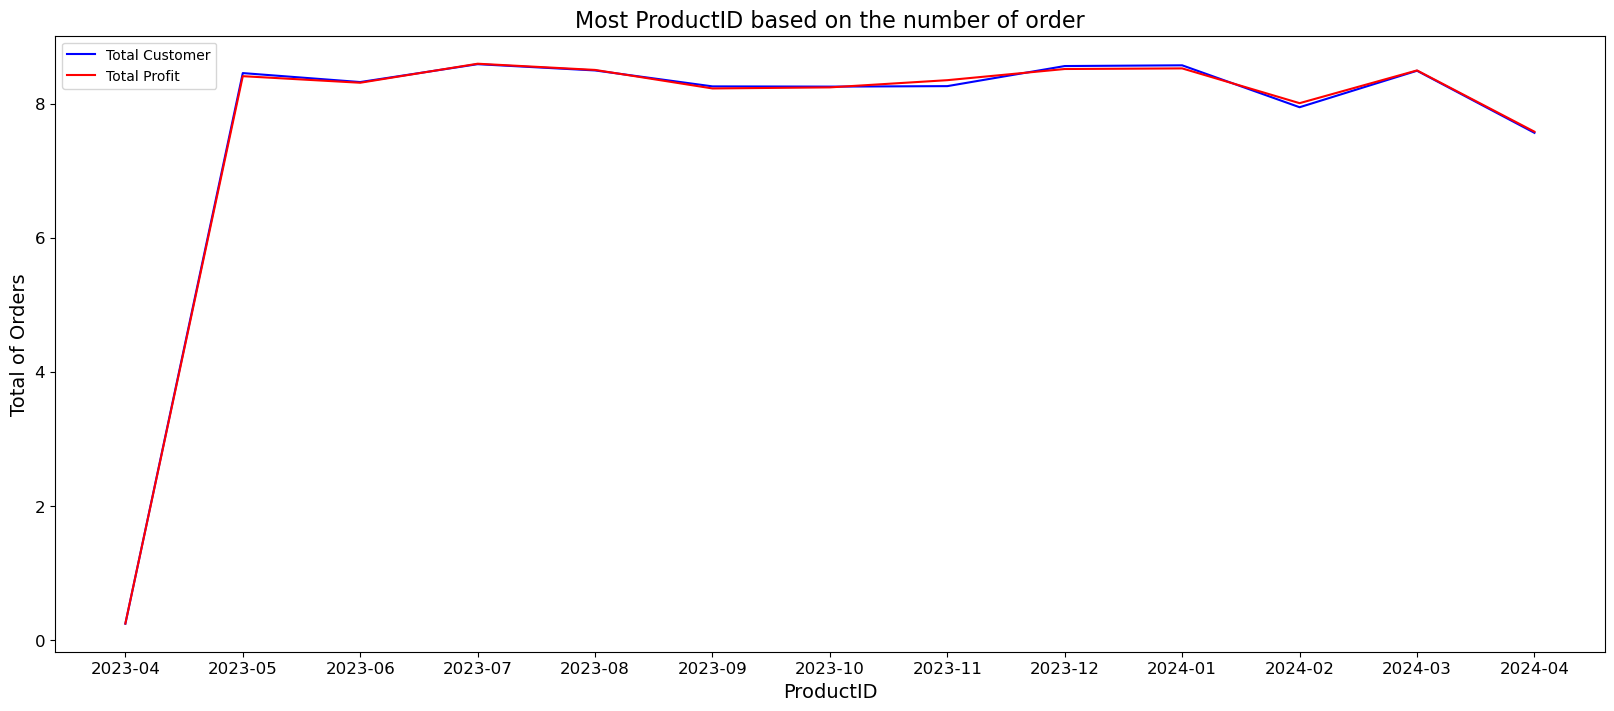

In [96]:
plt.figure(figsize=(20, 8))
plt.plot(trend_productid['TransactionMonthYear'], trend_productid['totalamount (%)'], color='blue')
plt.plot(trend_productid['TransactionMonthYear'], trend_productid['quantity (%)'], color='red')

plt.title('Most ProductID based on the number of order', fontsize=16)
plt.xlabel('ProductID', fontsize=14)
plt.ylabel('Total of Orders', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['Total Customer', 'Total Profit'])

plt.show()

The trend represents the level of stability in total customers and total ProductID profit over time. This also demonstrates a straightforward comparison of total customers and total profit.

#### PaymentMethod Segmentation

In [96]:
paymethod = df_retail.groupby('PaymentMethod').agg({'Quantity':'sum'}).reset_index()
paymethod = paymethod.rename(columns={'Quantity':'sum'})

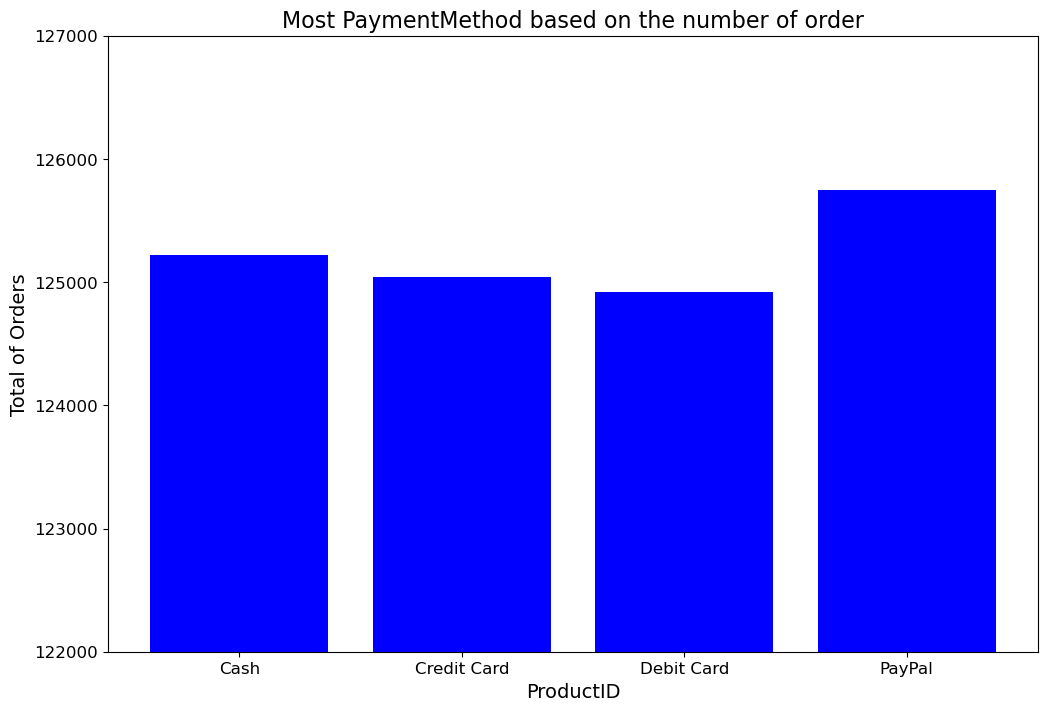

In [100]:
plt.figure(figsize=(12, 8))
plt.bar(paymethod['PaymentMethod'], paymethod['sum'], color='blue')

plt.title('Most PaymentMethod based on the number of order', fontsize=16)
plt.xlabel('ProductID', fontsize=14)
plt.ylabel('Total of Orders', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(122000, 127000)

plt.show()

Based on the number of orders placed, the most popular payment method is PayPal, followed by Cash, Credit Card, and Debit Card.